In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
df=pd.read_csv("C:\\Users\\Aysha Thuhfa\\Desktop\\Mall_Customers.csv")

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

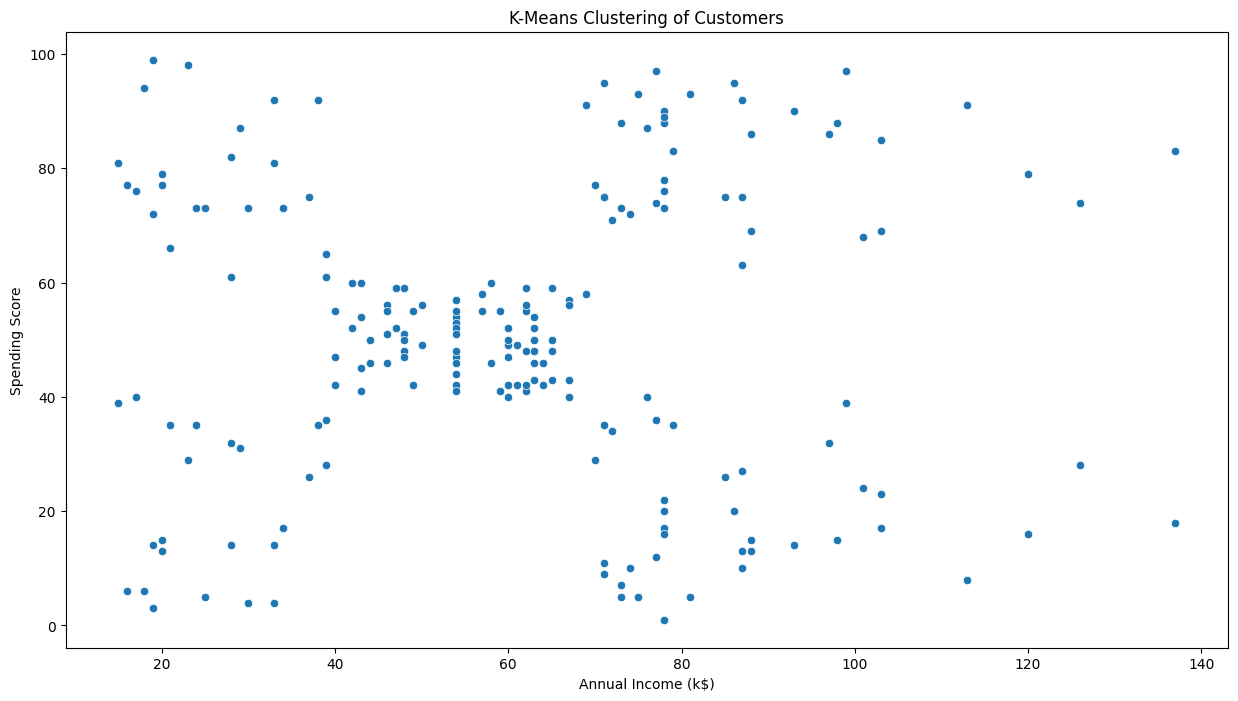

In [15]:
X = df.drop(columns=['CustomerID','Gender','Age'], axis=1).values
plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering of Customers')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)

In [17]:
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

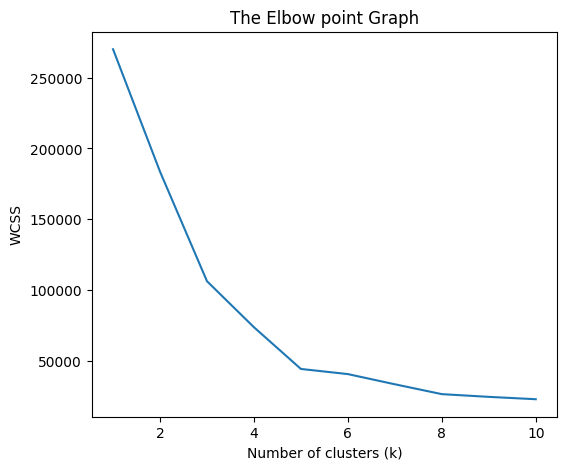

In [18]:
plt.figure(figsize=(6,5))
plt.plot(range(1,11),WCSS)
plt.title("The Elbow point Graph")
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
Y =kmeans.fit_predict (X)
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

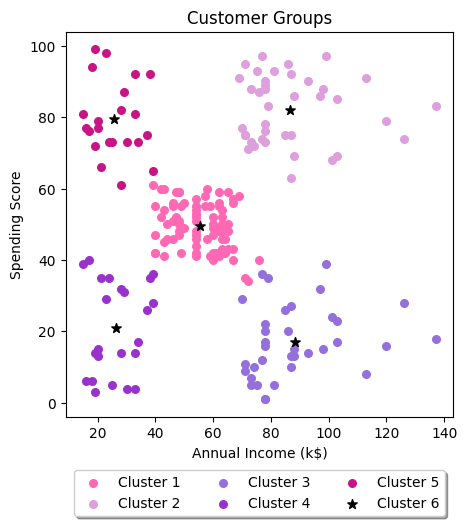

In [20]:
plt. figure(figsize=(5,5))
plt.scatter (X[Y==0,0], X[Y==0,1], s=30, c='hotpink', label='Cluster 1')
plt.scatter (X[Y==1,0], X[Y==1,1], s=30, c='plum', label='Cluster 2')
plt.scatter (X[Y==2,0], X[Y==2,1], s=30, c='mediumpurple', label='Cluster 3')
plt.scatter (X[Y==3,0], X[Y==3,1], s=30, c='darkorchid', label='Cluster 4')
plt.scatter (X[Y==4,0], X[Y==4,1], s=30, c='mediumvioletred', label='Cluster 5')
plt.scatter (kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='black',marker='*' ,label = 'Cluster 6')
plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Centroids'], loc='upper left')
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),fancybox=True, shadow=True, ncol=3)
plt.show()